In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
"""
In this homework, you will implement and compare different numerical methods for solving
ordinary differential equations (ODEs). Specifically, you will implement the following methods:

1. Euler Method
2. Heun's Method (Modified Euler Method)
3. Backward Euler Method
4. Runge-Kutta 4th Order Method
5. Adams-Bashforth Method
"""

def f(x, y):
    return -2 * y

# Initial conditions
x0 = 0
y0 = 1
xn = 5
h = 0.1

In [54]:
"""
### Euler Method:
The Euler method uses the formula:

    y_(n+1) = y_n + h * f(x_n, y_n)

Your task: Implement the Euler method to solve the given ODE.
"""

def euler_method(f,x0,y0,xn,h):
    x,y=[x0],[y0]
    for _ in range(int((xn-x0)/h)):
        x.append(x[-1]+h);y.append(y[-1]+h*f(x[-1],y[-1]))
    return x,y

In [55]:
"""
### Heun's Method:
This method improves upon Euler's method by using the average of the slopes at the beginning and end
of the interval:

    y^* = y_n + h * f(x_n, y_n)  (Predictor step)
    y_(n+1) = y_n + h/2 * [f(x_n, y_n) + f(x_(n+1), y^*)]  (Corrector step)

Your task: Implement Heun's method to solve the given ODE.
"""


def heun_method(f, x0, y0, xn, h):
      # Implement here
    x = [x0 + i*h for i in range(int((xn-x0)/h)+1)]
    y, ys = y0, [y0]
    for xn_, x_next in zip(x, x[1:]):
        ys.append(y := y + h/2 * (f(xn_, y) + f(x_next, y + h*f(xn_, y))))
    return x, ys

In [56]:
"""
### Backward Euler Method:
Backward Euler is an implicit method that solves the equation:

    y_(n+1) = y_n + h * f(x_(n+1), y_(n+1))

This requires solving a nonlinear equation for y_(n+1). For simplicity, we'll use fixed-point
iteration to approximate the solution.

Your task: Implement the Backward Euler method to solve the given ODE.
"""

def backward_euler_method(f, x0, y0, xn, h, m=10, t=1e-6):
      # Implement here
    X, Y = [x0], [y0]
    while X[-1] < xn:
        X.append(x := X[-1] + h)
        y_prev, y = Y[-1], Y[-1]
        for _ in range(m):
            if abs(y - (y := y_prev + h*f(x, y))) < t: break
        Y.append(y)
    return X, Y

In [57]:
"""
### Runge-Kutta 4th Order Method:
The RK4 method calculates y_(n+1) using four intermediate slopes:

    k1 = h * f(x_n, y_n)
    k2 = h * f(x_n + h/2, y_n + k1/2)
    k3 = h * f(x_n + h/2, y_n + k2/2)
    k4 = h * f(x_n + h, y_n + k3)
    y_(n+1) = y_n + (k1 + 2*k2 + 2*k3 + k4) / 6

Your task: Implement the Runge-Kutta 4th Order method to solve the ODE.
"""

def runge_kutta_4(f, x0, y0, xn, h):
    x = [x0 + i*h for i in range(int((xn-x0)/h)+1)]
    y = [y0]
    for xi, xn in zip(x, x[1:]):
        y.append(y[-1] + ((k1:=h*f(xi,y[-1])) + 2*(k2:=h*f((xh:=xi+h/2), y[-1]+k1/2)) + 2*(k3:=h*f(xh, y[-1]+k2/2)) + (k4:=h*f(xn, y[-1]+k3)))/6)
    return x, y

In [58]:
"""
### Adams-Bashforth Method:
Adams-Bashforth methods are explicit multistep methods. For the 2-step Adams-Bashforth method:

    y_(n+1) = y_n + h * [3/2 * f(x_n, y_n) - 1/2 * f(x_(n-1), y_(n-1))]

This requires at least two initial values, which can be computed using another method (e.g., Euler or RK4).

Your task: Implement the 2-step Adams-Bashforth method to solve the ODE.
"""
def adams_bashforth_2(f, x0, y0, xn, h):
    x, y = [x0], [y0]
    x.append(x[-1] + h); y.append(y[-1] + h * f(x[-1], y[-1]))
    for _ in range(int((xn - x0) / h) - 1):
        x.append(x[-1] + h); y.append(y[-1] + h * (1.5 * f(x[-1], y[-1]) - 0.5 * f(x[-2], y[-2])))
    return x, y

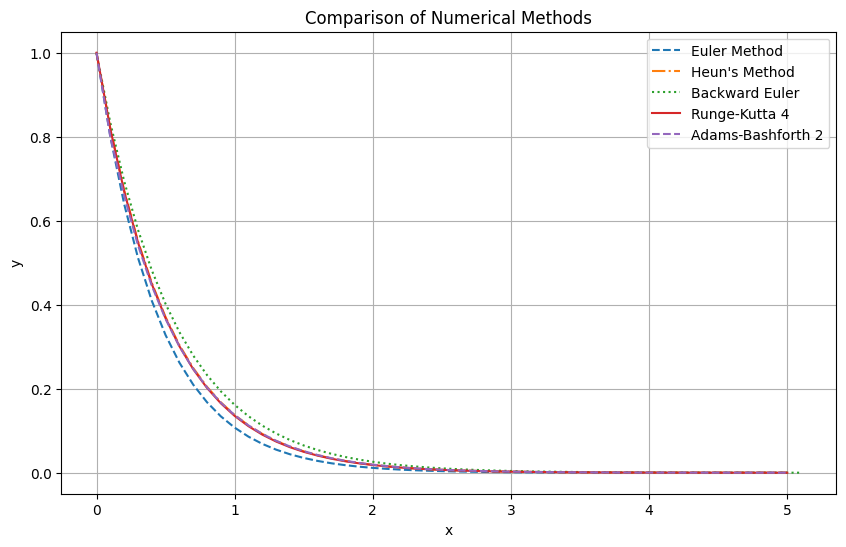

In [59]:
x_euler, y_euler = euler_method(f, x0, y0, xn, h)
x_heun, y_heun = heun_method(f, x0, y0, xn, h)
x_backward_euler, y_backward_euler = backward_euler_method(f, x0, y0, xn, h)
x_rk4, y_rk4 = runge_kutta_4(f, x0, y0, xn, h)
x_ab, y_ab = adams_bashforth_2(f, x0, y0, xn, h)

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label="Euler Method", linestyle="--")
plt.plot(x_heun, y_heun, label="Heun's Method", linestyle="-.")
plt.plot(x_backward_euler, y_backward_euler, label="Backward Euler", linestyle=":")
plt.plot(x_rk4, y_rk4, label="Runge-Kutta 4", linestyle="-")
plt.plot(x_ab, y_ab, label="Adams-Bashforth 2", linestyle="--")
plt.title("Comparison of Numerical Methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()